In [1]:
from utility_dfcounter import *
from utility_bfsolver import *
from utility_dfcutter import *

# 1. Count Signal MC

In [1]:
# count
trigger,btag = 'e','1b'
ct = DFCounter(trigger,btag)

n,nVar = ct.returnNMCsg()
a,aVar = ct.returnAcc(enhanceStat=False)

In [ ]:
slv = BFSolver3D(a,bte=0.1772832, btm=0.1731072)

# 3. Error Prop

In [36]:
br = slv.solveQuadEqn(slv.setMeasuredX(nData=n, nMcbg=np.zeros(4)))


nStd = n**0.5
dbr = []
for c in range(4):
    ncopy = n.copy()
    ncopy[c] += nStd[c]
    br1 = slv.solveQuadEqn(slv.setMeasuredX(nData=ncopy, nMcbg=np.zeros(4)))
    dbr.append(br-br1)

dbr = np.array(dbr)
dbr = np.sum(dbr**2,axis=0)**0.5

for i in range(3):
    print('{:5.3f}+/-{:5.3f}'.format(100*br[i],100*dbr[i]))


10.804+/-0.073
10.797+/-0.059
10.794+/-0.152


# 2. Generate Toys

In [25]:

brs = []
for i in range(2000):
    dn = np.random.normal(0,n**0.5)
    br = slv.solveQuadEqn(slv.setMeasuredX(nData=n+dn, nMcbg=np.zeros(4)))
    brs.append(br)
brs = np.array(brs)

# 3. Make Plots

NameError: name 'brs' is not defined

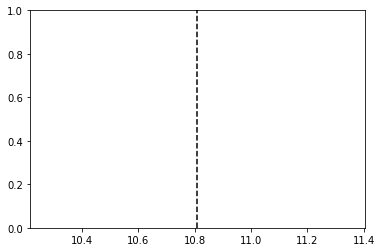

In [2]:
from scipy.stats import norm
mybins = np.linspace(10.0,12.0,100)
step = (mybins[1]-mybins[0])/2

x = np.linspace(10,12,1000)

plt.figure(facecolor='w',figsize=(6,4))

plt.axvline(10.81,linestyle="--",c='k',label="MC Truth")

br = 100*brs[:,0]
mu0,sigma0 = br.mean(), br.std()
plt.hist(br,bins=mybins,alpha=0.4,normed=True,color='C0', label=r'$B_e=$ {:5.2f}$\pm${:5.2f}'.format(mu0,sigma0))

br = 100*brs[:,1]
mu1,sigma1 = br.mean(), br.std()
plt.hist(br,bins=mybins,alpha=0.4,normed=True,color='C1', label=r'$B_\mu=$ {:5.2f}$\pm${:5.2f}'.format(mu1,sigma1))

br = 100*brs[:,2]
mu2,sigma2 = br.mean(), br.std()
plt.hist(br,bins=mybins,alpha=0.4,normed=True,color='C2', label=r'$B_\tau=$ {:5.2f}$\pm${:5.2f}'.format(mu2,sigma2))


plt.plot(x,norm.pdf(x,mu0,sigma0),c='C0')
plt.plot(x,norm.pdf(x,mu1,sigma1),c='C1')
plt.plot(x,norm.pdf(x,mu2,sigma2),c='C2')

plt.xlabel(r'$B(W\to l)$ [%]')


plt.legend()
plt.grid(True,linestyle="--",alpha=0.5)
plt.savefig('../plots/closedTest/{}{}.pdf'.format(trigger,btag))

# --- R Solver ---

In [7]:
trigger,btag = 'mu','1b'
#trigger,btag = 'e','2b'
ct = DFCounter(trigger,btag)

In [8]:
nMCsg, nMCsgVar = ct.getNMCsg(trigger+trigger,ct.nbjet)
a,aVar = ct.getAcc(trigger+trigger,ct.nbjet,enhanceStat=False)

nMCsgP, nMCsgVarP = ct.getNMCsg(trigger+trigger+'p',ct.nbjet)
aP,aVarP = ct.getAcc(trigger+trigger+'p',ct.nbjet,enhanceStat=False)

a,aVar = np.array([a,aP]),np.array([aVar,aVarP])
nMCsg, nMCsgVar = np.array([nMCsg,nMCsgP]),np.array([nMCsgVar,nMCsgVarP])

In [9]:
slv = RSovler(a, bwl=0.1080, bte=0.1773, btm=0.1731)

n = nMCsg
nStd = n**0.5
x, xVar = common.getEfficiency( n[1]-0, n[0]-0 )
print('X = {:5.4f}+/-{:5.4f}'.format(x,xVar**0.5))

print('X = {:5.4f}+/-{:5.4f}'.format(n[1]/n[0],x*sqrt( np.sum( (nStd/n)**2 ) )))

X = 0.1960+/-0.0016
X = 0.1960+/-0.0019


In [10]:
r = slv.solveQuadEqn(x)
r1 = slv.solveQuadEqn(x+xVar**0.5)

dr = np.abs(r-r1)

print('r = {:5.3f}+/-{:5.3f}'.format(r,dr))

r = 1.000+/-0.052
